In [14]:
# https://www.statsmodels.org/dev/example_formulas.html

import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from scipy.stats import linregress 
import matplotlib.pyplot as plt 


%matplotlib inline 
from scipy.spatial import distance 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import statsmodels.graphics as smg
import math
from statsmodels.api import graphics
import seaborn as sns
sns.set(style='ticks', color_codes=True)


In [15]:
data1 = pd.read_csv('post_processed.csv', encoding='utf-8')
data1.drop(['Unnamed: 0', 'is_student'], axis=1, inplace=True)

In [16]:
categorical=[
        'gender', 
        'position',
        'industry',
        'earning_year', 
        'privacy_feelings',
        'compensation_share_data', 
        'value_pers_data', 
        'where', 
        'smartphone_kind',
        'age_group'
        ]

numerical=[        
        'nr_devices',
        'tot_install_apps', 
        'nr_install_games', 
        'nr_purchase_goods_apps',
        'nr_pay_sub_apps', 
        'nr_banks_apps', 
        'nr_social_net_apps',
        'nr_installed_payment_systems' 
        ]

In [17]:
def create_dummies(df,column_name): 
    dummies = pd.get_dummies(df[column_name],prefix=column_name) 
    df = pd.concat([df,dummies],axis=1) 
    df=df.drop(column_name, axis=1)
    return df

def norm(df, column_name):
    assert df is not None
    c=df[column_name]
    df[column_name] = (c - c.mean()) / c.std()
    return df

d=data1.copy()
d=d.fillna(d.median())

for c in categorical:
    d=create_dummies(d, c)

for c in numerical:
    d=norm(d, c)

In [37]:
np.random.seed(42)

In [38]:
n_clusters=4
model = KMeans(
    n_clusters=n_clusters,
    init='k-means++',
    n_jobs=-1,
    random_state=1)

model = model.fit(d)

y = model.predict(d)
data1['cluster'] = y
columns=d.columns

pca.explained_variance_ratio:  0.2891900382507415


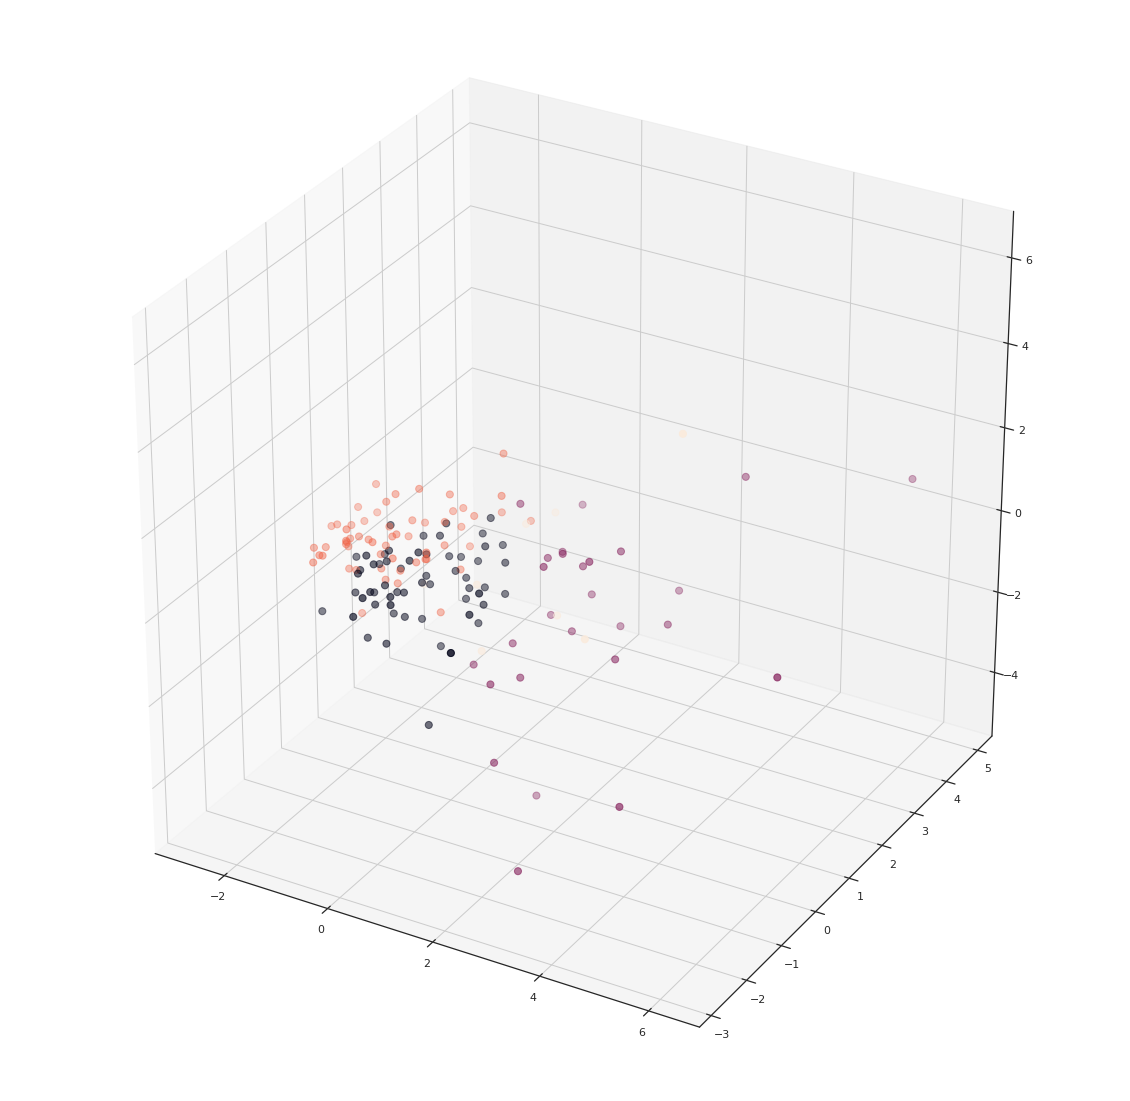

In [39]:
# PCA in 3 dimensions
pca=PCA(n_components=3, random_state=1)
pca.fit(d)
xpca = pca.transform(d)

print('pca.explained_variance_ratio: ', pca.explained_variance_ratio_.cumsum()[1]) # want > 0.90

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xpca[:,0], xpca[:,1], xpca[:,2], c=y, s=50)
plt.show()

pca.explained_variance_ratio:  0.2891900382507415


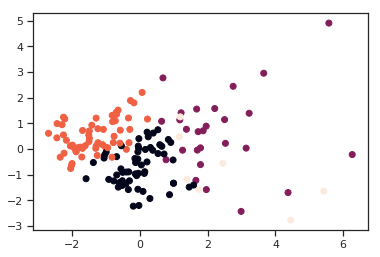

In [40]:
# PCA in two dimensions
pca=PCA(n_components=2, random_state=1)
pca.fit(d)
xpca = pca.transform(d)

print('pca.explained_variance_ratio: ', pca.explained_variance_ratio_.cumsum()[1]) # want > 0.90

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

plt.scatter(xpca[:,0], xpca[:,1], c=y)
plt.show()

pd.options.display.max_rows=100
cl = pd.DataFrame(model.cluster_centers_)
cl.columns=columns

In [41]:
from sklearn.utils import resample
def bootstrap(data, n_samples, count=100):
    for x in range(0, count):
        sample = resample(data, n_samples=n_samples, replace=True, random_state=x)
        sample_c = { w:n for c in categorical for w,n in sample[c].value_counts().iteritems() }
        yield sample_c


	==== [cluster id: 0, size: 59] ====


,mean,std,baseline-mean,baseline-std,normalized delta
nr_devices,1.796610,0.663836,1.769737,0.809467,0.033199
tot_install_apps,34.288136,19.741476,34.552632,29.205096,-0.009057
nr_install_games,4.949153,4.775742,5.375000,7.796087,-0.054623
nr_purchase_goods_apps,3.491525,3.313363,3.618421,4.158983,-0.030511
nr_pay_sub_apps,0.915254,1.071385,1.361842,1.931096,-0.231261
nr_banks_apps,1.474576,0.816974,1.664474,1.894377,-0.100243
nr_social_net_apps,5.966102,2.281606,4.585526,2.910233,0.474386
nr_installed_payment_systems,0.915254,1.055170,1.236842,1.890152,-0.170139


{'Female': 2.009983712463269, 'Male': 0.010004206014960104, 'non-binary': 0.46961108444719724, 'unpaid': 2.0099997331361656, 'paid': 0.010000266863834484, 'Education': 2.0092441238383696, 'Consumer': 1.5125045685775556, 'Technology': 0.6339139561199216, 'Healthcare': 0.24198931689759084, 'Non-profit': 1.0840524055925564, 'Finance': 0.09325143445833839, 'Professional Services': 0.018814122656701238, 'Government': 0.13884225467152467, 'low': 2.009981758982971, 'medium': 0.012165487185199053, 'nocare_agree': 2.009999999949696, 'annoyed_agree': 0.010091696154585272, '(read_agree)_want': 1.514393688972087, '(read_agree)_nowant': 0.015365275122019018, 'depends': 2.0099481645875104, 'yes_no_free': 0.013867389757728055, 'yes_free': 0.23972986184215905, 'never': 0.0852831238827747, 'average cost': 1.9675330203976202, 'expensive': 0.34476862349814463, 'low cost': 1.191813526853883, 'highly expensive': 0.025621210164952113, 'free': 1.1543728118845022, 'UK': 2.0095776258882965, 'CONTINENTAL EUROPE

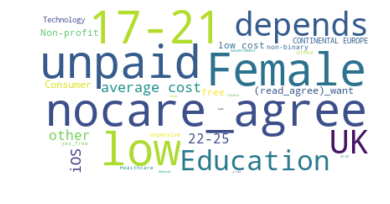

	==== [cluster id: 1, size: 27] ====


,mean,std,baseline-mean,baseline-std,normalized delta
nr_devices,2.259259,0.984206,1.769737,0.809467,0.604747
tot_install_apps,63.481481,42.235030,34.552632,29.205096,0.990541
nr_install_games,13.962963,13.177724,5.375000,7.796087,1.101574
nr_purchase_goods_apps,8.592593,5.678971,3.618421,4.158983,1.196007
nr_pay_sub_apps,3.629630,3.014684,1.361842,1.931096,1.174353
nr_banks_apps,2.444444,1.281025,1.664474,1.894377,0.411729
nr_social_net_apps,4.666667,2.449490,4.585526,2.910233,0.027881
nr_installed_payment_systems,2.962963,3.322204,1.236842,1.890152,0.913218


{'Female': 1.6523939929093334, 'Male': 0.41626605484149803, 'unpaid': 0.784878342817084, 'paid': 1.2351216571829153, 'Professional Services': 2.0098948857656076, 'Technology': 1.3640166096086896, 'Education': 0.06829726160490812, 'Healthcare': 1.72862565206945, 'Finance': 1.8074168502802954, 'Consumer': 0.06403034053600587, 'Non-profit': 0.3387750467846705, 'low': 0.7819353895412658, 'medium': 0.9091286920005649, 'high': 1.1443808475181216, 'nocare_agree': 0.2685360924738134, 'annoyed_agree': 1.3662523704840486, '(read_agree)_nowant': 0.9357803681044777, '(read_agree)_want': 1.3764068853396811, 'other': 0.9085667593379803, 'depends': 0.2709311808722443, 'yes_no_free': 1.9717281302845118, 'yes_free': 1.053761047972495, 'never': 0.13053194488667075, 'average cost': 0.11488282441031239, 'expensive': 0.6384586987013658, 'highly expensive': 2.0040636723608536, 'low cost': 0.8672469411883561, 'free': 1.9136708200964407, 'USA': 2.0099605202172413, 'CONTINENTAL EUROPE': 0.242760104092147, 'UK'

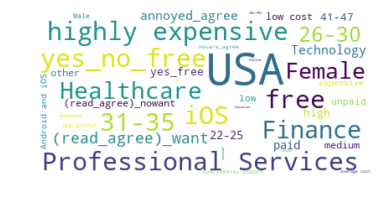

	==== [cluster id: 2, size: 58] ====


,mean,std,baseline-mean,baseline-std,normalized delta
nr_devices,1.448276,0.626111,1.769737,0.809467,-0.397127
tot_install_apps,18.293103,14.408828,34.552632,29.205096,-0.556736
nr_install_games,1.655172,2.196902,5.375000,7.796087,-0.477140
nr_purchase_goods_apps,1.534483,1.789007,3.618421,4.158983,-0.501069
nr_pay_sub_apps,0.724138,1.088909,1.361842,1.931096,-0.330229
nr_banks_apps,0.948276,0.980913,1.664474,1.894377,-0.378065
nr_social_net_apps,2.396552,1.425823,4.585526,2.910233,-0.752165
nr_installed_payment_systems,0.551724,0.882031,1.236842,1.890152,-0.362467


{'Male': 2.0099800854566627, 'Female': 0.010043683332465969, 'unpaid': 0.010189618029698644, 'paid': 2.0098103819703015, 'Education': 0.10716851652676362, 'Consumer': 1.1949528469690867, 'Technology': 0.41660839237781444, 'Healthcare': 1.6271975230598947, 'Professional Services': 1.61995636290284, 'Finance': 1.1521464814187243, 'Government': 1.571729361010771, 'Non-profit': 1.1324164103401024, 'Transport': 1.8496333944892553, 'low': 0.04005223227111154, 'medium': 1.8961802963450594, 'high': 1.8014838166746292, 'annoyed_agree': 2.0099409714298266, '(read_agree)_nowant': 1.9906135564585647, 'nocare_agree': 0.01000000037313642, 'other': 1.2718648645739303, '(read_agree)_want': 0.5401760794769026, 'depends': 0.035769251005079106, 'yes_no_free': 1.637664553477425, 'never': 1.944889716558353, 'yes_free': 1.3855003999898612, 'average cost': 0.4652999303033989, 'expensive': 1.7575344211004027, 'low cost': 0.8443218830854331, 'highly expensive': 1.521334829864028, 'CONTINENTAL EUROPE': 1.738298

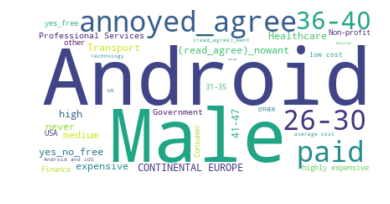

	==== [cluster id: 3, size: 8] ====


,mean,std,baseline-mean,baseline-std,normalized delta
nr_devices,2.250,1.281740,1.769737,0.809467,0.593308
tot_install_apps,56.750,29.523598,34.552632,29.205096,0.760051
nr_install_games,6.500,5.976143,5.375000,7.796087,0.144303
nr_purchase_goods_apps,2.875,2.031010,3.618421,4.158983,-0.178751
nr_pay_sub_apps,1.625,1.597990,1.361842,1.931096,0.136274
nr_banks_apps,5.625,5.755432,1.664474,1.894377,2.090675
nr_social_net_apps,10.000,3.380617,4.585526,2.910233,1.860495
nr_installed_payment_systems,2.750,1.281740,1.236842,1.890152,0.800548


{'Male': 2.005294258928332, 'Female': 0.01566588006181624, 'paid': 2.0096469289143792, 'unpaid': 0.010719959070237595, 'Technology': 1.8380063179241377, 'Education': 0.4592827845639271, 'Consumer': 0.23815832028527018, 'Government': 0.7828299926844472, 'Finance': 0.5769939246244646, 'medium': 2.009574233971729, 'low': 0.010000491795529642, 'high': 1.9010072533082343, 'nocare_agree': 1.7788883921545744, '(read_agree)_nowant': 1.9705023310450287, 'depends': 0.016881400405409197, 'yes_no_free': 1.4608479238509562, 'never': 1.7141800100410265, 'yes_free': 0.43901717454179845, 'average cost': 1.5376106043393807, 'expensive': 0.5335800712849998, 'low cost': 0.2731198245460962, 'highly expensive': 0.23361900610114916, 'OTHER': 2.00999999999711, 'UK': 0.3746535568658591, 'CONTINENTAL EUROPE': 0.05408151206114087, 'USA': 0.06952498946087837, 'iOS': 1.9797601789974986, 'Android': 0.12659788123363624, '22-25': 1.399738645514165, '36-40': 1.9592414435962224, '26-30': 0.2594820040978283, '17-21': 0

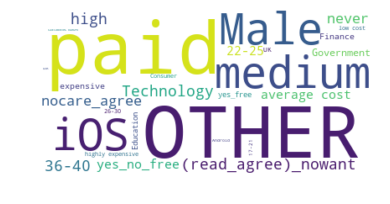

In [42]:
import math
import wordcloud as wc

desc_cols = ['mean', 'std']
baseline_numerical = data1[numerical].describe().transpose()[desc_cols]\
    .rename({'mean': 'baseline-mean', 'std': 'baseline-std'}, axis=1)

for cluster_id in range(0, n_clusters):
    cluster = data1[data1['cluster']==cluster_id]
    cluster_size = len(cluster)
    print ('\t==== [cluster id: %s, size: %s] ====' %(cluster_id, cluster_size))
    
    stats_n = pd.concat([cluster[numerical].describe().transpose()[desc_cols], baseline_numerical], axis=1)
    stats_n['normalized delta'] = (stats_n['mean'] - stats_n['baseline-mean'])/stats_n['baseline-std']
    display(stats_n)
    
    stats = { w:n for c in categorical for w,n in cluster[c].value_counts().iteritems() } 
    
    baseline_categorical = pd.DataFrame(bootstrap(data1, cluster_size)).describe()

    def freq_value(w, n):
        x = math.erf((n-baseline_categorical[w]['mean'])/baseline_categorical[w]['std'])+1.01
        if x != x:
            return 0
        return x
    freq={ w:freq_value(w, n) for w,n in stats.items() } 
    print(freq)
    
    wordcloud = wc.WordCloud(background_color='white').generate_from_frequencies(freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

In [43]:
# detailed cluster display
def summary(name, c):
    if name in numerical:
        return (c.mean(), c.std())
    else:
        l=len(c)
        return sorted( ((k, n, n/l) for k, n in dict(c.value_counts()).items()), key=lambda c: c[1], reverse=True)

pd.set_option('display.max_colwidth', -1)
clusters=pd.DataFrame([{ c: summary(c, data1[data1['cluster']==cl][c]) 
                        for c in data1.columns} for cl in range(0, n_clusters) ] + 
                     [{ c: summary(c, data1[c]) for c in data1.columns}])

clusters.transpose()

,0,1,2,3,4
age_group,"[(22-25, 27, 0.4576271186440678), (17-21, 26, 0.4406779661016949), (26-30, 3, 0.05084745762711865), (31-35, 1, 0.01694915254237288), (41-47, 1, 0.01694915254237288), (36-40, 1, 0.01694915254237288)]","[(22-25, 12, 0.4444444444444444), (26-30, 5, 0.18518518518518517), (31-35, 4, 0.14814814814814814), (17-21, 3, 0.1111111111111111), (41-47, 2, 0.07407407407407407), (36-40, 1, 0.037037037037037035)]","[(22-25, 20, 0.3448275862068966), (26-30, 14, 0.2413793103448276), (17-21, 8, 0.13793103448275862), (36-40, 7, 0.1206896551724138), (41-47, 5, 0.08620689655172414), (31-35, 4, 0.06896551724137931)]","[(22-25, 4, 0.5), (36-40, 2, 0.25), (26-30, 1, 0.125), (17-21, 1, 0.125)]","[(22-25, 63, 0.4144736842105263), (17-21, 38, 0.25), (26-30, 23, 0.1513157894736842), (36-40, 11, 0.07236842105263158), (31-35, 9, 0.05921052631578947), (41-47, 8, 0.05263157894736842)]"
cluster,"[(0, 59, 1.0)]","[(1, 27, 1.0)]","[(2, 58, 1.0)]","[(3, 8, 1.0)]","[(0, 59, 0.3881578947368421), (2, 58, 0.3815789473684211), (1, 27, 0.17763157894736842), (3, 8, 0.05263157894736842)]"
compensation_share_data,"[(depends, 49, 0.8305084745762712), (yes_no_free, 6, 0.1016949152542373), (yes_free, 2, 0.03389830508474576), (never, 2, 0.03389830508474576)]","[(depends, 16, 0.5925925925925926), (yes_no_free, 8, 0.2962962962962963), (yes_free, 2, 0.07407407407407407), (never, 1, 0.037037037037037035)]","[(depends, 33, 0.5689655172413793), (yes_no_free, 13, 0.22413793103448276), (never, 8, 0.13793103448275862), (yes_free, 4, 0.06896551724137931)]","[(depends, 3, 0.375), (yes_no_free, 2, 0.25), (never, 2, 0.25), (yes_free, 1, 0.125)]","[(depends, 101, 0.6644736842105263), (yes_no_free, 29, 0.19078947368421054), (never, 13, 0.08552631578947369), (yes_free, 9, 0.05921052631578947)]"
earning_year,"[(low, 56, 0.9491525423728814), (medium, 3, 0.05084745762711865)]","[(low, 21, 0.7777777777777778), (medium, 4, 0.14814814814814814), (high, 2, 0.07407407407407407)]","[(low, 41, 0.7068965517241379), (medium, 12, 0.20689655172413793), (high, 5, 0.08620689655172414)]","[(medium, 4, 0.5), (low, 2, 0.25), (high, 2, 0.25)]","[(low, 120, 0.7894736842105263), (medium, 23, 0.1513157894736842), (high, 9, 0.05921052631578947)]"
gender,"[(Female, 50, 0.847457627118644), (Male, 8, 0.13559322033898305), (non-binary, 1, 0.01694915254237288)]","[(Female, 19, 0.7037037037037037), (Male, 8, 0.2962962962962963)]","[(Male, 31, 0.5344827586206896), (Female, 27, 0.46551724137931033)]","[(Male, 5, 0.625), (Female, 3, 0.375)]","[(Female, 99, 0.6513157894736842), (Male, 52, 0.34210526315789475), (non-binary, 1, 0.006578947368421052)]"
industry,"[(Education, 27, 0.4576271186440678), (Consumer, 11, 0.1864406779661017), (Technology, 10, 0.1694915254237288), (Healthcare, 4, 0.06779661016949153), (Non-profit, 3, 0.05084745762711865), (Finance, 2, 0.03389830508474576), (Professional Services, 1, 0.01694915254237288), (Government, 1, 0.01694915254237288)]","[(Professional Services, 6, 0.2222222222222222), (Technology, 6, 0.2222222222222222), (Education, 5, 0.18518518518518517), (Healthcare, 4, 0.14814814814814814), (Finance, 3, 0.1111111111111111), (Consumer, 2, 0.07407407407407407), (Non-profit, 1, 0.037037037037037035)]","[(Education, 14, 0.2413793103448276), (Consumer, 10, 0.1724137931034483), (Technology, 9, 0.15517241379310345), (Healthcare, 7, 0.1206896551724138), (Professional Services, 6, 0.10344827586206896), (Finance, 4, 0.06896551724137931), (Government, 3, 0.05172413793103448), (Non-profit, 3, 0.05172413793103448), (Transport, 2, 0.034482758620689655)]","[(Technology, 3, 0.375), (Education, 2, 0.25), (Consumer, 1, 0.125), (Government, 1, 0.125), (Finance, 1, 0.125)]","[(Education, 48, 0.3157894736842105), (Technology, 28, 0.18421052631578946), (Consumer, 24, 0.15789473684210525), (Healthcare, 15, 0.09868421052631579), (Professional Services, 13, 0.08552631578947369), (Finance, 10, 0.06578947368421052), (Non-profit, 7, 0.046052631578947366), (Government, 5, 0.03289473684210526), (Trans

A simple transformation was performed to dummy encode categorical columns and normalize each numerical column by its standard deviation. 

KMean was performend on the resulting data, aggregating each observation into one of 3 clusters. The target number of clusters was found empirically as is the larger cluster count that still produce all reasonably sized clusters. At 4 KMean produces 3 large clusters plus 1 tiny one.

As each observation is a point on n-dimensions, with n failry large, it is not possible to produce an n-dimensional graph  showing the clusters; instead, to qualitatively evaluate the cluster quality, Principal Component Analisys was performed on the input data to project it into two and three dimensions arbitrary dimensions. 

The respective 2 and 3 plots show two related high density clusters and a low density cluster. Clustering seems to have captured, to a certain extent some actual structure in the data. Because the dimensions in the PCA projection are artificial and only weakly related to columns in the original data, they do not help understand the main features of each cluster.

Note that the explained variance ratio for both PCA transformations is not very high, so the projected dimensions do not capture well all the information in the unprojected data, but as clustering was performed on the non-projected data and PCA is only used as a visualization aid, this is not an issue.

Instead to better understand visually each cluster a different approch was attempted. For categorical data, a word cloud was used; each word is a possible answer to one the survey question and its size is proportional to the number of times it appears in the cluster, minus the expected number of times it would appear in the average random subset of observations of (generated via bootstrapping) of the same size, normalized with the standard deviation of that word in the same average subset. This normalizatoin provides an idea of the weight of each answer in the cluster compared to the unclustered data.

Regarding numerical columns, mean and standard deviation statisitics are simply shown for each cluster along side the statistics for the unclustered data plus a normalized delta column showing how much the cluster average differes from the unclustered data.
 
Looking at these results, the first cluster appear to include, on average, older responders, with an higher representation of males than the unclassified universe and a lower representation of students (and conversely an higher salary). The population of this cluster appear to use android at an higher rate than baseline and is less willing to share personal information which values more highly. They appear to install less applicatons than average; of these applications, a lower proportion than baseline are social networks (consistent with their higher valuation of personal data), but an higher proportion are banking or payment apps; paid subscription apps also appear to be over represented (possibly consitent with their higher income). 

The defining feature of the second cluster appear to be people that install a significantly higher number of apps than baseline, games in particular are overepresented. Not many categorical features stand out for this group. It appears to be slightly older than baseline and males are slightly more represented. iOS is much more likely to be used than android. It possibly values personal data slightly more than baseline and it seems that in proportion it installs less social apps than baseline (but consider that there are only so many social apps and this group install significantly more apps in general than baseline: the lower ratio might be expected).

The final cluster appear to consist mostly of young, female, unpaid students. They value their personal data very little and install significantly more social apps than baseline.

The raw cluster data is provided in tabular form along side the unclustered universe (column 4).